In [35]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
os.listdir('../data')

['holidays_events.csv',
 'items.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train.csv',
 'transactions.csv']

## Load the data into DataFrame

In [3]:
train = pd.read_csv('../data/train.csv', parse_dates = ['date'])

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.shape

(125497040, 6)

In [5]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [6]:
df = train[(train['store_nbr'] == 44) & (train['item_nbr'] == 1503844)]

In [168]:
store_sub = train[(train['store_nbr'] == 44) & (train['item_nbr'] == 1503844)]
store_sub.reset_index(drop = True, inplace = True)

In [169]:
store_sub.shape

(621, 5)

## View data as a function of time 

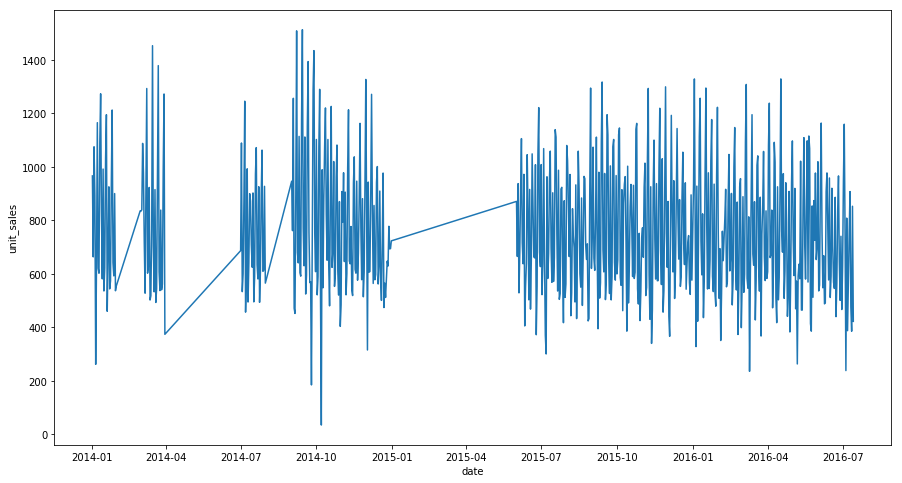

In [170]:
ax = sns.lineplot(x = store_sub['date'], y = store_sub['unit_sales'], ci  = None)

Text(0.5, 1.0, 'Sales by month')

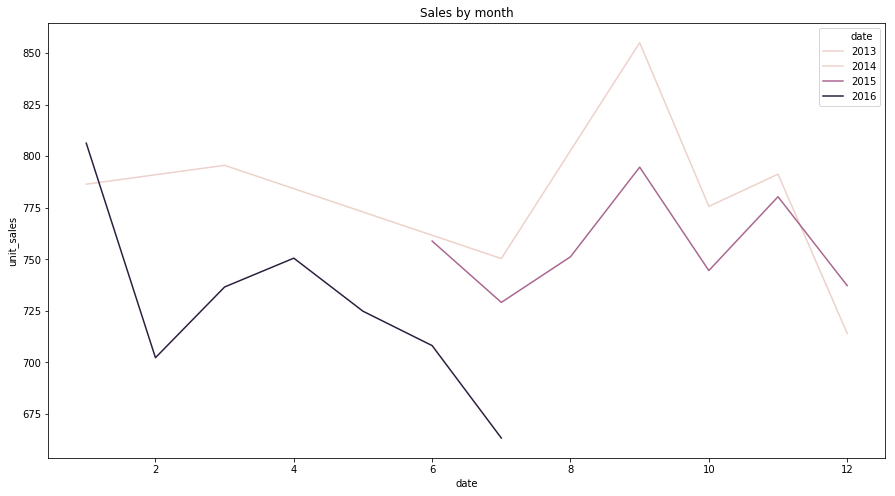

In [171]:
ax = sns.lineplot(x = store_sub['date'].dt.month , y = store_sub['unit_sales'], hue = store_sub['date'].dt.year, ci  = None)
ax.set_title('Sales by month')

Text(0.5, 1.0, 'Sales by day of the week')

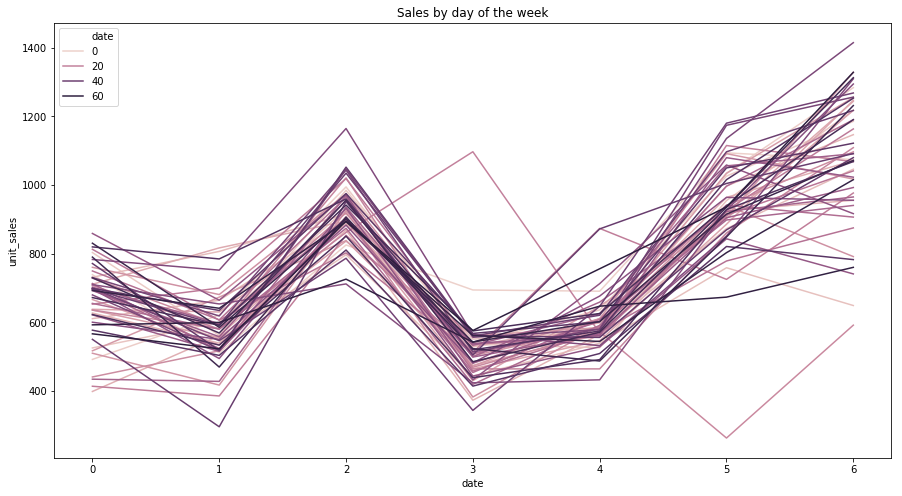

In [172]:
ax = sns.lineplot(x = store_sub['date'].dt.dayofweek , y = store_sub['unit_sales'], hue = store_sub['date'].dt.weekofyear, ci  = None)
ax.set_title('Sales by day of the week')

Text(0.5, 1.0, 'Sales by day of month')

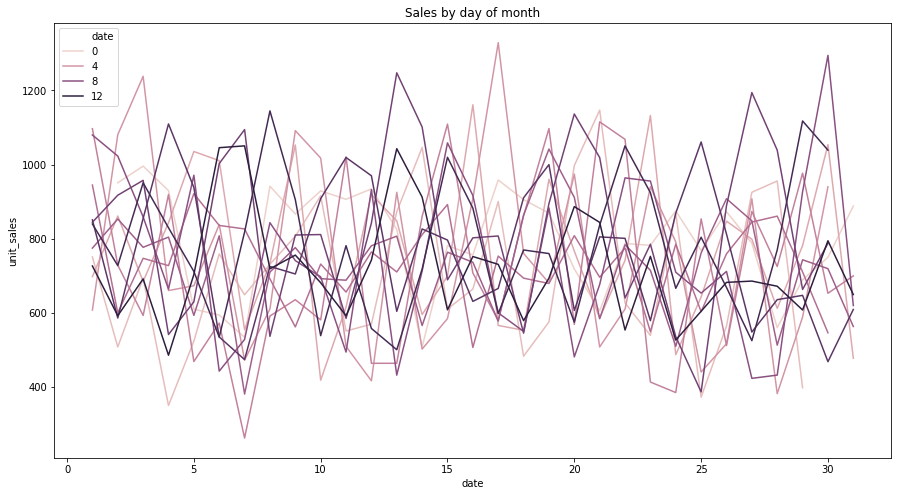

In [173]:
ax = sns.lineplot(x = store_sub['date'].dt.day , y = store_sub['unit_sales'], hue = store_sub['date'].dt.month, ci  = None)
ax.set_title('Sales by day of month')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

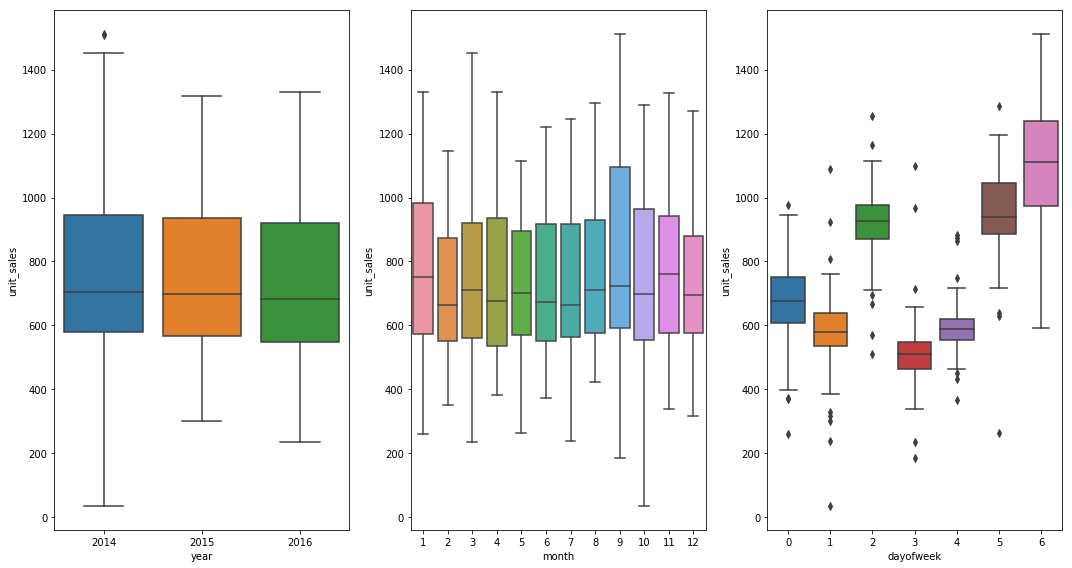

In [174]:
store_sub['year'] = [d.year for d in store_sub.date]
store_sub['month'] = [d.month for d in store_sub.date]
store_sub['dayofyear'] = [d.dayofyear for d in store_sub.date]
store_sub['dayofweek'] = [d.dayofweek for d in store_sub.date]

# Draw Plot
fig, axes = plt.subplots(1, 3)
sns.boxplot(x = 'year', y = 'unit_sales', data = store_sub, ax = axes[0])
sns.boxplot(x = 'month', y = 'unit_sales', data = store_sub, ax = axes[1])
sns.boxplot(x = 'dayofweek', y = 'unit_sales', data = store_sub, ax = axes[2])
fig.tight_layout()

In [175]:
store_sub.drop(['year', 'month', 'dayofweek', 'dayofyear'], axis = 1, inplace = True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Fill in the missing data 

In [344]:
store_sub = df

In [345]:
store_sub.head(50)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
16377457,16377457,2014-01-02,44,1503844,966.1490,NaN
16442863,16442863,2014-01-03,44,1503844,663.4050,NaN
16511061,16511061,2014-01-04,44,1503844,1075.0000,NaN
16578789,16578789,2014-01-05,44,1503844,892.6080,NaN
16642520,16642520,2014-01-06,44,1503844,261.5540,NaN
16705308,16705308,2014-01-07,44,1503844,646.7160,NaN
16768213,16768213,2014-01-08,44,1503844,1165.2097,NaN
16830673,16830673,2014-01-09,44,1503844,620.6760,NaN
16892999,16892999,2014-01-10,44,1503844,602.2430,NaN
16960548,16960548,2014-01-11,44,1503844,1090.4050,NaN


In [346]:
# create a list of dates which contains the missing dates in the original dataframe
date_diff = store_sub['date'] - store_sub.shift(periods = 1, axis = 0)['date']

dates = [store_sub['date'].iloc[0]]
for idx, d in enumerate(date_diff[1:]):
    if d == pd.Timedelta('1 days'):
        # no break in the dates
        dates.append(store_sub['date'].iloc[idx + 1])
    else:
        # missing data
        while d > pd.Timedelta('0 days'):
            dates.append(store_sub['date'].iloc[idx + 1] - d + pd.Timedelta('1 days'))
            d -= pd.Timedelta('1 days')
            
dates = pd.DataFrame(dates, columns = ['date'])

In [347]:
store_sub = pd.merge(dates, store_sub, how = 'outer', on = 'date')

try:
    store_sub.drop('onpromotion', axis = 1, inplace = True)
except Exception:
    pass

In [348]:
print(store_sub.shape)
store_sub.head(60)

(1322, 5)


,date,id,store_nbr,item_nbr,unit_sales
0,2014-01-02,16377457.0,44.0,1503844.0,966.1490
1,2014-01-03,16442863.0,44.0,1503844.0,663.4050
2,2014-01-04,16511061.0,44.0,1503844.0,1075.0000
3,2014-01-05,16578789.0,44.0,1503844.0,892.6080
4,2014-01-06,16642520.0,44.0,1503844.0,261.5540
5,2014-01-07,16705308.0,44.0,1503844.0,646.7160
6,2014-01-08,16768213.0,44.0,1503844.0,1165.2097
7,2014-01-09,16830673.0,44.0,1503844.0,620.6760
8,2014-01-10,16892999.0,44.0,1503844.0,602.2430
9,2014-01-11,16960548.0,44.0,1503844.0,1090.4050


In [349]:
def seasonal_mean(ts, i, n, m, w, alpha):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    # weekly average
    ts_week = ts[i::-n]
    denom = w*(w**(len(ts_week) - 1) - 1)/(w-1)
    ts_week = sum(x for x in (list(map(lambda x: x[1]*(w**x[0]), [x for x in enumerate(ts_week)]))) if not np.isnan(x)) / denom
    print(ts_week)
    
    # monthly
    ts_month = ts[i::-m]
    denom = w*(w**(len(ts_month) - 1) - 1)/(w-1)
    ts_month = sum(x for x in (list(map(lambda x: x[1]*(w**x[0]), [x for x in enumerate(ts_month)]))) if not np.isnan(x)) / denom
    print(ts_month)
    print('---')
    
    avg = ((alpha * ts_week) + ((1 - alpha) * ts_month))
    return avg

for idx, row in store_sub.iterrows():
    if type(row['unit_sales']) != np.float:
        print(idx)
        store_sub.at[idx, 'unit_sales'] = seasonal_mean(store_sub['unit_sales'], idx, 7, 30, 0.7, 0.)

30
1014.7947295696804
966.1489999999999
---
31
1176.0622005527043
663.405
---
32
575.5497441768654
1075.0
---
33
617.9903861034347
892.6080000000001
---
34
960.6800979470984
261.55400000000003
---
35
585.8569842054018
646.716
---
36
586.6060472034907
1165.2097
---
37
997.2527261909057
620.6759999999999
---
38
991.1942907936966
602.243
---
39
755.6551337492338
1090.405
---
40
717.0194921207313
1273.1889999999999
---
41
708.5701495330135
826.3919999999999
---
42
606.5490950982091
581.054
---
43
783.3317219507884
991.7418999999999
---
44
869.2163576059867
535.784
---
45
858.9505609876342
622.446
---
46
869.470338667945
1030.838
---
47
906.1175408153897
1194.892
---
48
748.6296668227269
459.93199999999996
---
49
598.2141478201227
666.378
---
50
851.4659195117463
925.2419
---
51
760.2094638976677
543.6080000000001
---
52
781.6316477117476
573.8240000000001
---
53
922.22522914432
945.8650000000001
---
54
1000.5247153440595
1212.514
---
55
654.2475975264637
641.27
---
56
619.9142724773257
592

411
739.8072160086318
699.3146983442103
---
412
754.2150374369988
743.6028444211216
---
413
825.1672686118518
847.6029981663798
---
414
742.0060444012713
658.9846926551545
---
415
765.7965286377209
728.502562938626
---
416
810.4043536967216
681.7852664673294
---
417
759.6380927697245
817.3427405250059
---
418
727.6594607004895
741.8896460607763
---
419
751.0313795299255
708.7667206197043
---
420
831.8979874816293
745.599078325377
---
421
717.0996388647835
748.7009858326247
---
422
754.6083389223087
885.8343868661233
---
423
771.818627508301
757.86627283793
---
424
776.9494871051036
608.6113967797337
---
425
731.9285163107443
917.0884662721047
---
426
738.3519818504177
784.575938743181
---
427
806.0083147255473
687.3620890529063
---
428
726.5800429585076
716.3491897244676
---
429
793.9761533194531
926.6839000421598
---
430
767.6329211057017
804.0294390964965
---
431
726.4480599895337
851.0164053241596
---
432
787.4765013189061
789.6397053113818
---
433
752.2191689231781
793.884188015282

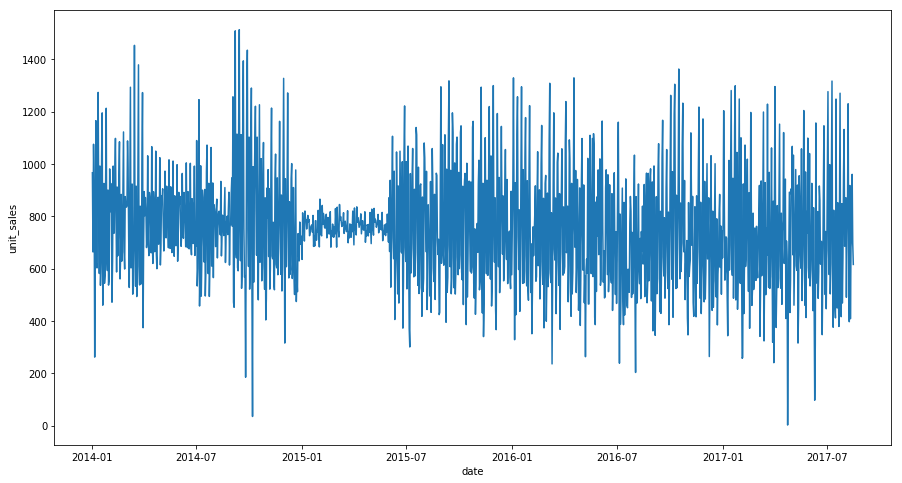

In [268]:
sns.lineplot(x = 'date', y = 'unit_sales', data = store_sub)

In [281]:
store_sub['log_unit_sales'] = np.log(store_sub['unit_sales'])

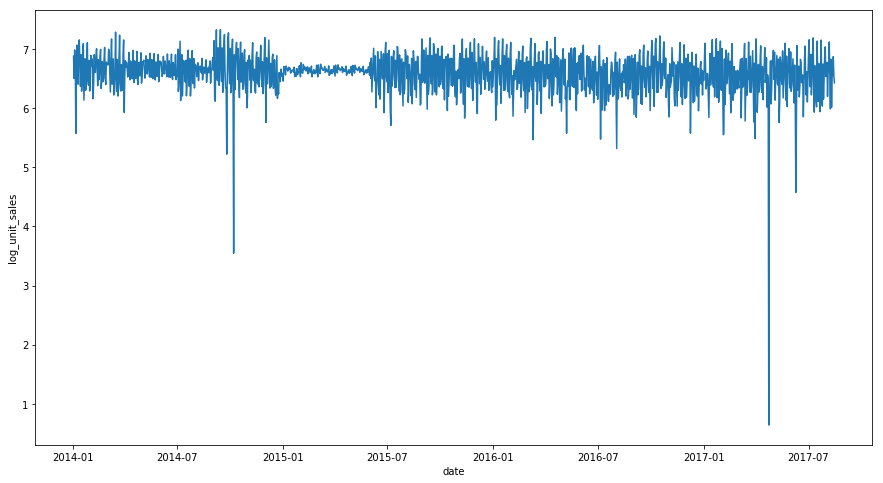

In [282]:
sns.lineplot(x = 'date', y = 'log_unit_sales', data = store_sub)

## Holt Winters

In [283]:
from statsmodels.tsa.api import ExponentialSmoothing
import math
from sklearn.metrics import mean_squared_error

In [284]:
train_ratio = 0.7
train, test = store_sub.iloc[:round(train_ratio * store_sub.shape[0]), :], store_sub.iloc[round(train_ratio * store_sub.shape[0]):, :]
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

print(train.shape)
print(test.shape)

(925, 6)
(397, 6)


In [335]:
# for a in alpha:
#     for b in beta:
a, b, g = 0.23, 0.9, 0.9

print('a: {}, b: {}, g: {}'.format(a, b, g))
model = ExponentialSmoothing(endog = train['log_unit_sales'], trend = None, seasonal = 'add', seasonal_periods = 7)
model_fit = model.fit(smoothing_level = a, smoothing_slope = b, smoothing_seasonal = g, optimized = True)
predictions = model_fit.forecast(len(test))
test['predictions'] = np.exp(predictions.values)

error = mean_squared_error(test['unit_sales'], test['predictions'])
print('Test MSE: {}'.format(error))
print('Test RMSE: {}'.format(math.sqrt(error)))
print('\n')

a: 0.23, b: 0.9, g: 0.9
Test MSE: 27914.316148675207
Test RMSE: 167.07577965903738




D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


                0
count  925.000000
mean    -0.000430
std      0.283117
min     -2.772154
25%     -0.116558
50%      0.000000
75%      0.114465
max      2.513677


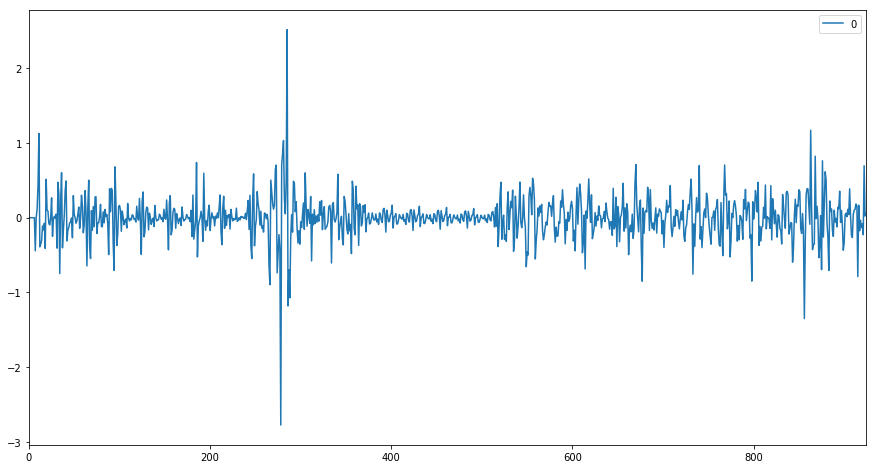

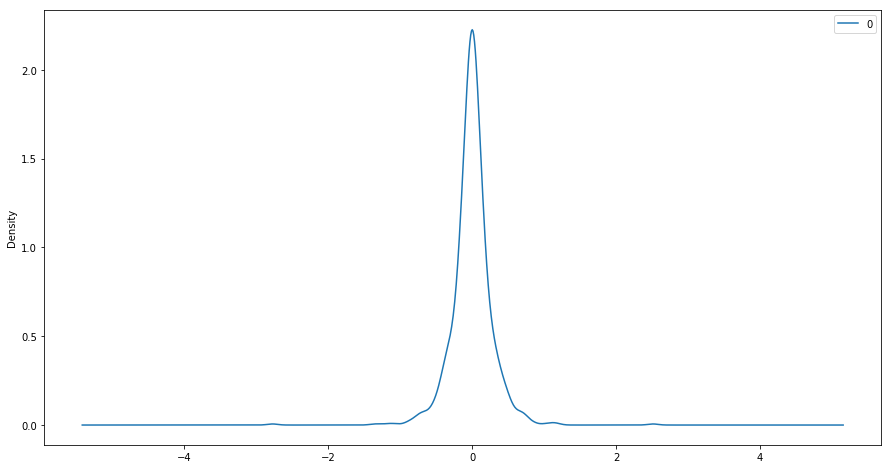

In [336]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind = 'kde')
print(residuals.describe())

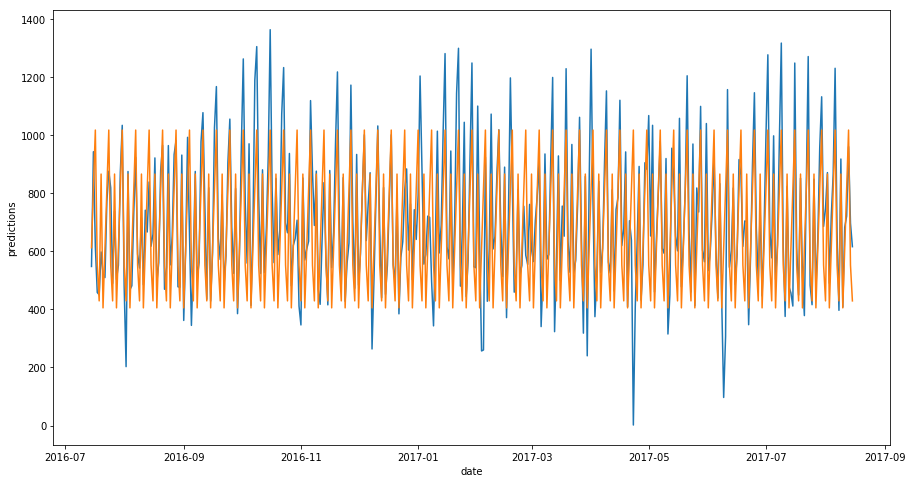

In [337]:
sns.lineplot(x = 'date', y = 'unit_sales', data = test)
sns.lineplot(x = 'date', y = 'predictions', data = test)